In [1]:
import pandas as pd
import statsmodels.api 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)  #remove punctuation
    return text


In [3]:
df=pd.read_csv("retractions35215(1).csv")
duplicates = df.count()-df.nunique()#check dupulicates
missing_values_count = df.isnull().sum()
df['Paywalled']=df['Paywalled'].fillna('Unknown')  #missing value
print(missing_values_count)
duplicates

Record ID                    0
Title                        0
Subject                      0
Institution                  1
Journal                      0
Publisher                    0
Country                      0
Author                       0
URLS                     15254
ArticleType                  0
RetractionDate               0
RetractionDOI              206
RetractionPubMedID        2559
OriginalPaperDate            0
OriginalPaperDOI             0
OriginalPaperPubMedID     2551
RetractionNature             0
Reason                       0
Paywalled                    2
Notes                    24706
CitationCount                0
dtype: int64


Record ID                    0
Title                       28
Subject                  25955
Institution               2078
Journal                  29685
Publisher                34640
Country                  33595
Author                    1729
URLS                     16750
ArticleType              35147
RetractionDate           30429
RetractionDOI             1586
RetractionPubMedID       17101
OriginalPaperDate        28942
OriginalPaperDOI             0
OriginalPaperPubMedID    15863
RetractionNature         35214
Reason                   28759
Paywalled                35210
Notes                     4720
CitationCount            34816
dtype: int64

In [4]:
# Convert 'RetractionDate' and 'OriginalPaperDate' columns to datetime objects with the correct format
df['RetractionDate'] = pd.to_datetime(df['RetractionDate'], format='%d/%m/%Y')
df['OriginalPaperDate'] = pd.to_datetime(df['OriginalPaperDate'], format='%d/%m/%Y')

# Calculate the difference between 'RetractionDate' and 'OriginalPaperDate' in days
df['DateDifference'] = (df['RetractionDate'] - df['OriginalPaperDate']).dt.days

In [5]:
df['words_feature']=df['Title']+df['Subject']+df['Institution']+df['Journal']+df['Notes']
df['words_feature']=df['words_feature'].fillna('') 

In [6]:
# bag of words
vectorizer = CountVectorizer(min_df=30, max_df=0.7,stop_words='english',
                             token_pattern=r'(?u)\b[a-zA-Z]+\b', max_features=10000)

In [7]:
#remove number remove rare word and frequent words

X = vectorizer.fit_transform(df['words_feature'])

titles_bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
pca = PCA(0.70).fit(titles_bow_df)
print("70%% variance is explained by: %.d components." % pca.n_components_)


70% variance is explained by: 71 components.


In [8]:
pca = PCA(n_components=71)  
df_words = pca.fit_transform(titles_bow_df)

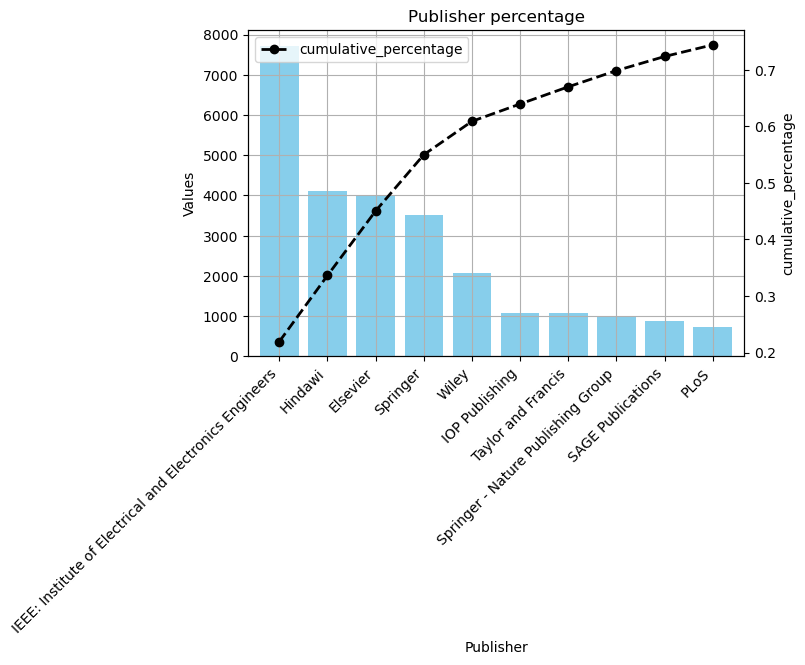

In [9]:
#publisher analysis
df1=df.groupby('RetractionDate')['Record ID'].count()
df2=df.groupby('Publisher').size()
df2=pd.DataFrame(df2.reset_index())
df2.columns=['Publisher','count']
df2=df2.sort_values(by=['count'], ascending=[False])
df2['cumulative_percentage']=df2['count'].cumsum()/df2['count'].sum()

df2=df2.set_index('Publisher')

fig, ax = plt.subplots()
df2['count'][0:10].plot(kind='bar', color='skyblue', ax=ax, width=0.8)
df2['cumulative_percentage'][0:10].plot(secondary_y=True, style='--ko', ax=ax, linewidth=2)
ax.set_title('Publisher percentage')
ax.set_xlabel('Publisher')
ax.set_ylabel('Values')
ax.right_ax.set_ylabel('cumulative_percentage')
fig.autofmt_xdate(rotation=45)

ax.grid(True)
ax.right_ax.legend(['cumulative_percentage'], loc='upper left')

plt.show()

NameError: name 'df3' is not defined

C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 158 (\x9e) missing from current font.
  func(*args, **kwargs)
C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 152 (\x98) missing from current font.
  func(*args, **kwargs)
C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 156 (\x9c) m

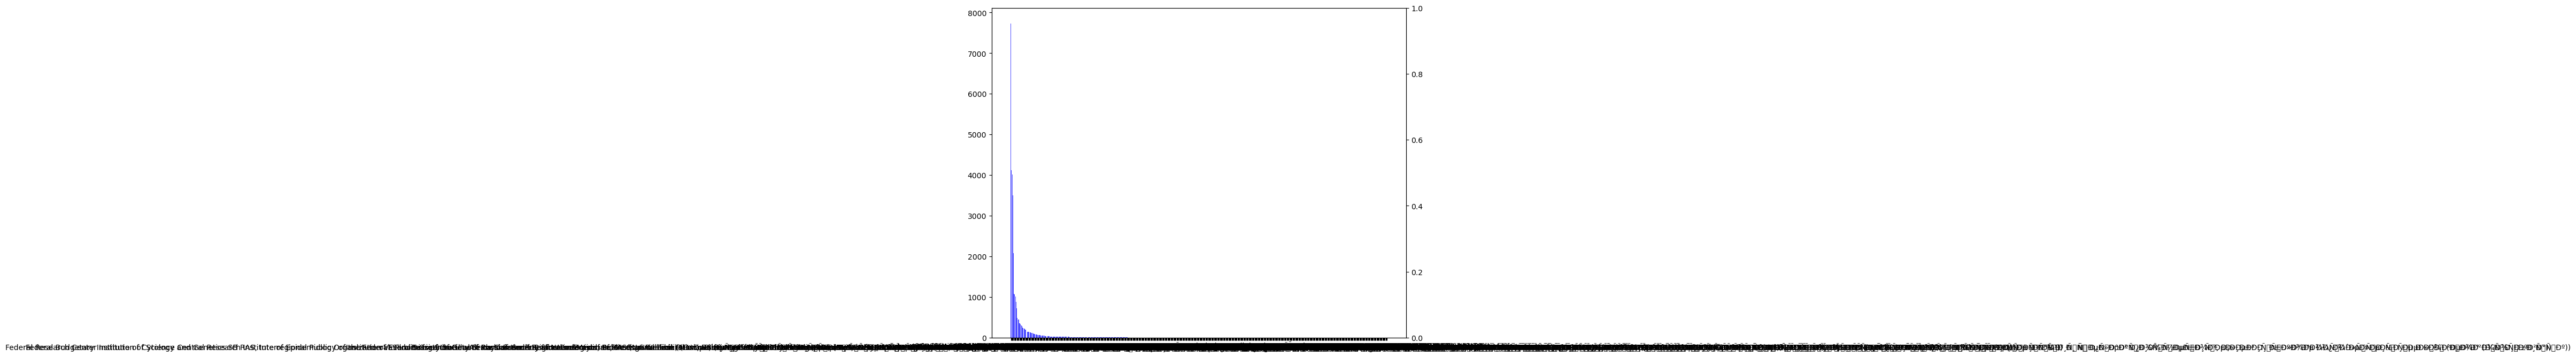

In [12]:
import matplotlib.pyplot as plt

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the count of papers by country
ax.bar(df2.index, df2['count'], color='b', alpha=0.7, label='Count')

# Create a twin Axes sharing the xaxis
ax2 = ax.twinx()

# Plot the cumulative percentage
ax2.plot(df3.index, df3['cumulative_percentage'], color='r', marker='o', label='Cumulative Percentage')

# Set labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax2.set_ylabel('Cumulative Percentage')
ax.set_title('Country Analysis')

# Show legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()


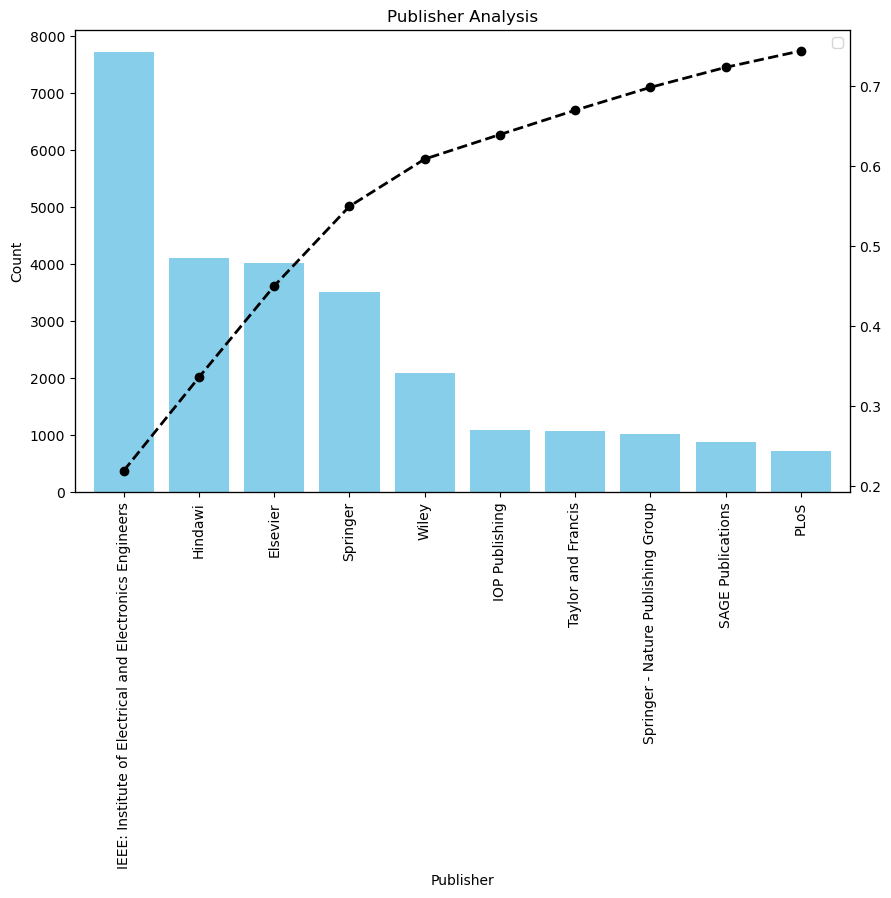

In [20]:
import matplotlib.pyplot as plt

# Publisher analysis
df2 = df.groupby('Publisher').size()
df2 = pd.DataFrame(df2.reset_index())
df2.columns = ['Publisher', 'count']
df2 = df2.sort_values(by=['count'], ascending=[False])
df2['cumulative_percentage'] = df2['count'].cumsum() / df2['count'].sum()
df2 = df2.set_index('Publisher')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the count of papers by publisher
df2['count'][0:10].plot(kind='bar', color='skyblue', ax=ax, width=0.8)

# Create a twin Axes sharing the x-axis
ax2 = ax.twinx()

# Plot the cumulative percentage
df2['cumulative_percentage'][0:10].plot(secondary_y=True, style='--ko', ax=ax2, linewidth=2)

# Set labels and title
ax.set_title('Publisher Analysis')
ax.set_xlabel('Publisher')
ax.set_ylabel('Count')
ax2.set_ylabel('Cumulative Percentage')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show legend
ax2.legend(['Cumulative Percentage'], loc='upper right')

# Show plot
plt.show()


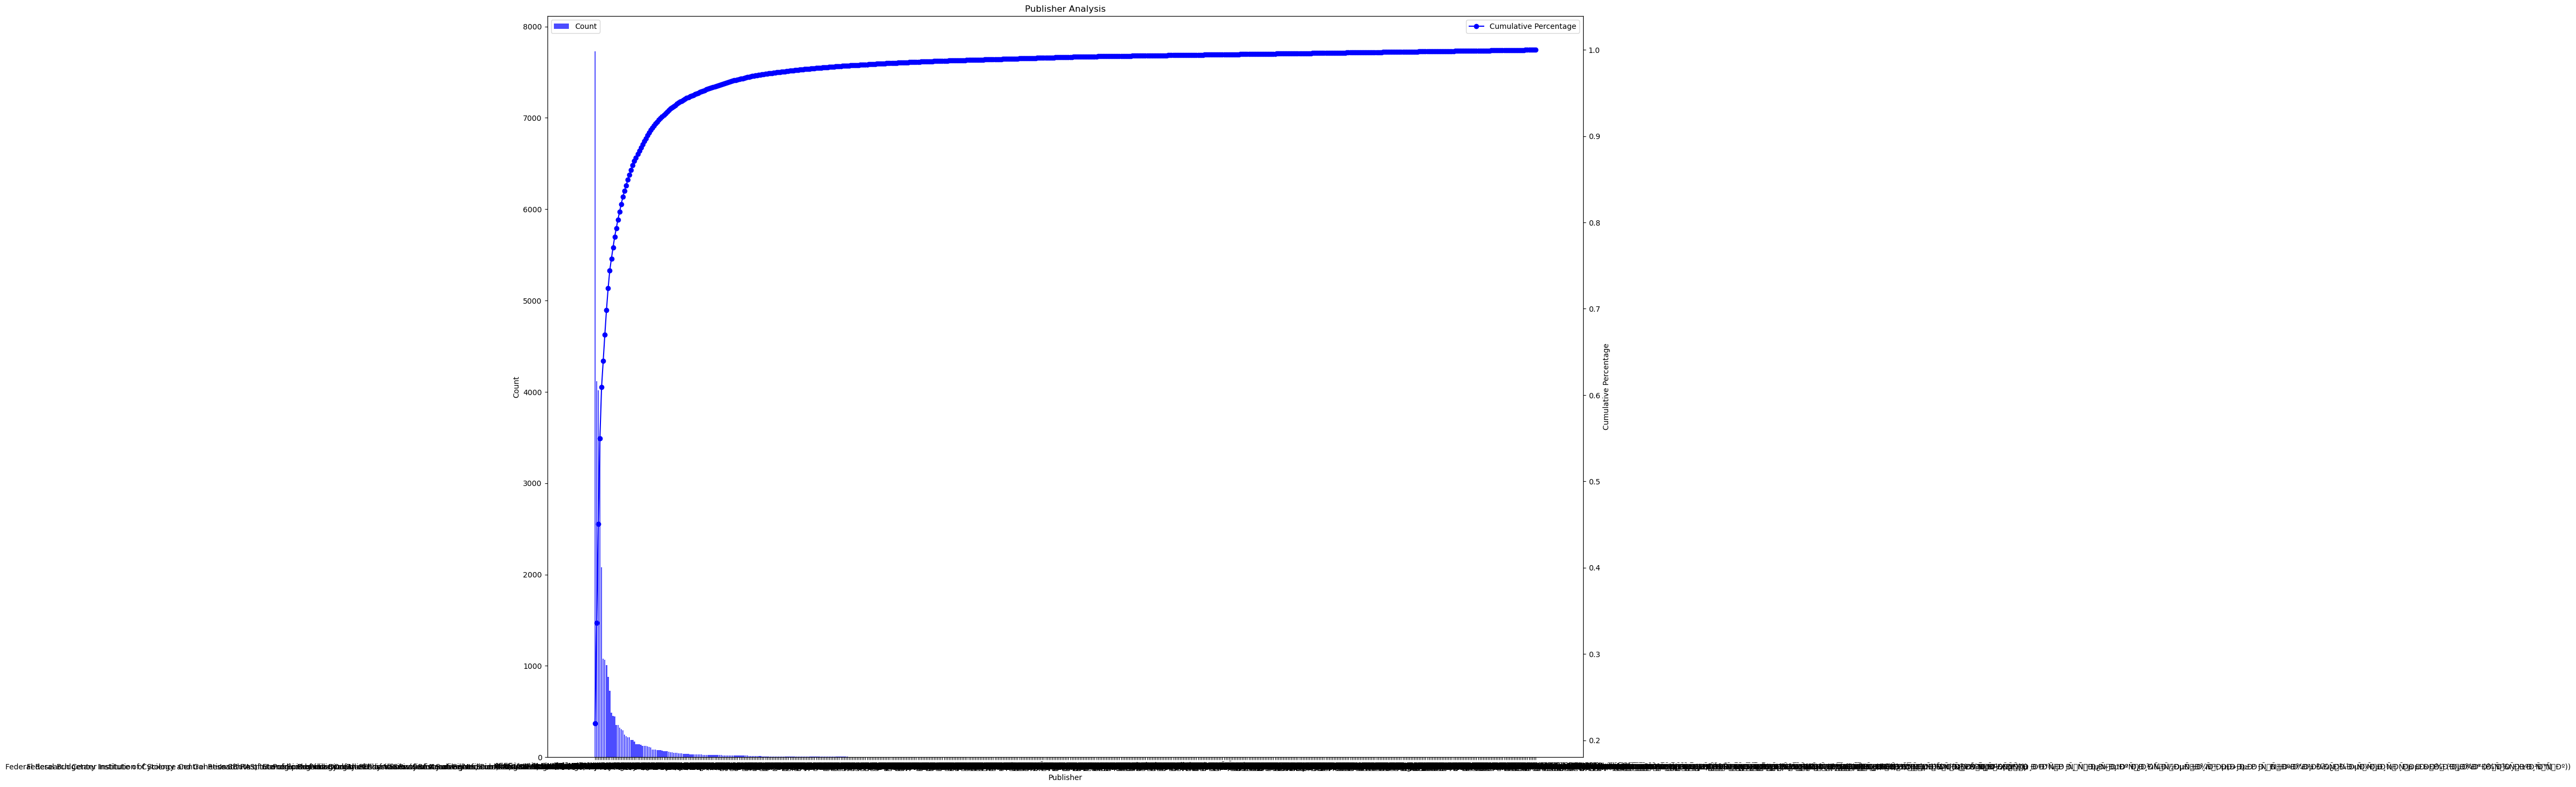

In [13]:
import matplotlib.pyplot as plt

# Create a bar plot
fig, ax = plt.subplots(figsize=(25,18))

# Plot the count of papers by publisher
ax.bar(df2.index, df2['count'], color='b', alpha=0.7, label='Count')

# Create a twin Axes sharing the xaxis
ax2 = ax.twinx()

# Plot the cumulative percentage
ax2.plot(df2.index, df2['cumulative_percentage'], color='b', marker='o', label='Cumulative Percentage')

# Set labels and title
ax.set_xlabel('Publisher')
ax.set_ylabel('Count')
ax2.set_ylabel('Cumulative Percentage')
ax.set_title('Publisher Analysis')

# Show legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels
plt.xticks(rotation=0)

# Show plot
plt.show()


In [14]:

#Reason
df['Reason_Count'] = df['Reason'].str.count('\;')
df_reason2=df[['Reason_Count','Reason']].groupby('Reason_Count').count()

In [15]:
#cleaning
df['Contains_Investigation'] = df['Reason'].str.contains('investigation', case=False).astype(int)
df['Contains_Unreliable'] = df['Reason'].str.contains('Unreliable', case=False).astype(int)
df['Contains_Data'] = df['Reason'].str.contains('Data', case=False).astype(int)
df['Contains_Date'] = df['Reason'].str.contains('Date', case=False).astype(int)
df['Contains_Breach'] = df['Reason'].str.contains('Breach', case=False).astype(int)
df['Contains_Fake'] = df['Reason'].str.contains('Fake', case=False).astype(int)
df['Contains_Limited'] = df['Reason'].str.contains('Limited', case=False).astype(int)
df['Contains_Duplication'] = df['Reason'].str.contains('Duplication', case=False).astype(int)
df['Contains_Referencing'] = df['Reason'].str.contains('Referencing', case=False).astype(int)
df['Contains_Peer'] = df['Reason'].str.contains('Peer', case=False).astype(int)
df['Contains_Randomly'] = df['Reason'].str.contains('Randomly', case=False).astype(int)
df['Contains_Plagiarism'] = df['Reason'].str.contains('Plagiarism', case=False).astype(int)
df['Contains_Mill'] = df['Reason'].str.contains('Mill', case=False).astype(int)
df['Contains_Misconduct'] = df['Reason'].str.contains('Misconduct', case=False).astype(int)
df['Contains_Upgrade'] = df['Reason'].str.contains('Upgrade', case=False).astype(int)
df['Contains_Falsification'] = df['Reason'].str.contains('Falsification', case=False).astype(int)
df['Contains_Unresponsive'] = df['Reason'].str.contains('Unresponsive', case=False).astype(int)
df['Contains_Image'] = df['Reason'].str.contains('Image', case=False).astype(int)
df['Contains_Approval'] = df['Reason'].str.contains('Approval', case=False).astype(int)
df['Contains_Authorship'] = df['Reason'].str.contains('Authorship', case=False).astype(int)
df['Contains_Withdrawal'] = df['Reason'].str.contains('Withdrawal', case=False).astype(int)

In [16]:

#union all single reasons
df_split = df['Reason'].str.split(';', expand=True)
for i in df_split.columns:
    if i==df_split.columns[0]:
        df_allreason=pd.concat([df_split[0],df_split[1]])
    elif i==df_split.columns[-3]:
        df_allreason=pd.concat([df_allreason,df_split[i+2]])
        break
    else:
        df_allreason=pd.concat([df_allreason,df_split[i+2]])
        

In [17]:
# Check top reasons for data cleaning
df_allreason=pd.DataFrame(df_allreason)
df_allreason.columns=['count']
df_allreason=df_allreason.groupby('count').size()
df_allreason.sort_values(ascending=[False],inplace=True)
df_allreason=df_allreason.reset_index()
df_allreason['cumulative_percentage']=df_allreason[0].cumsum()/df_allreason[0].sum()
df_allreason=df_allreason.set_index('count')

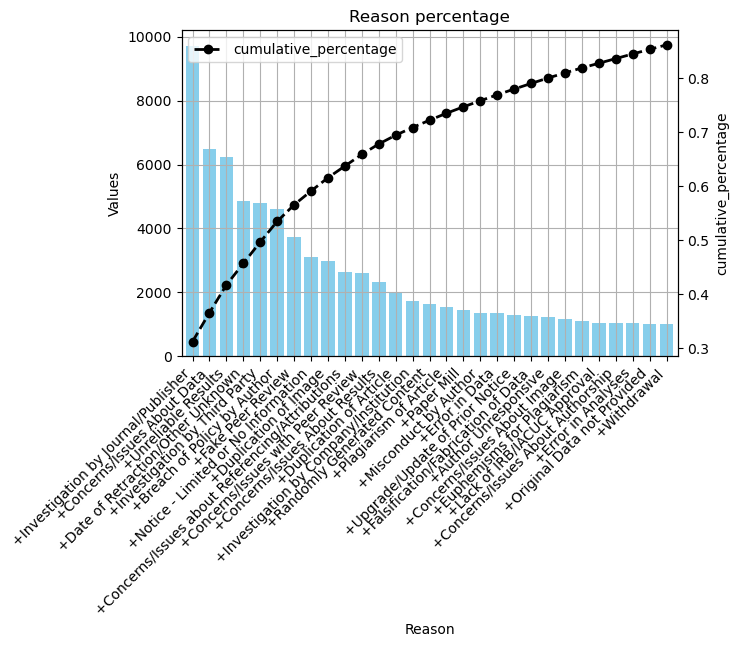

In [18]:

fig, ax = plt.subplots()
df_allreason[0][1:30].plot(kind='bar', color='skyblue', ax=ax, width=0.8)
df_allreason['cumulative_percentage'][1:30].plot(secondary_y=True, style='--ko', ax=ax, linewidth=2)
ax.set_title('Reason percentage')
ax.set_xlabel('Reason')
ax.set_ylabel('Values')
ax.right_ax.set_ylabel('cumulative_percentage')
fig.autofmt_xdate(rotation=45)
ax.grid(True)
ax.right_ax.legend(['cumulative_percentage'], loc='upper left')
plt.show()


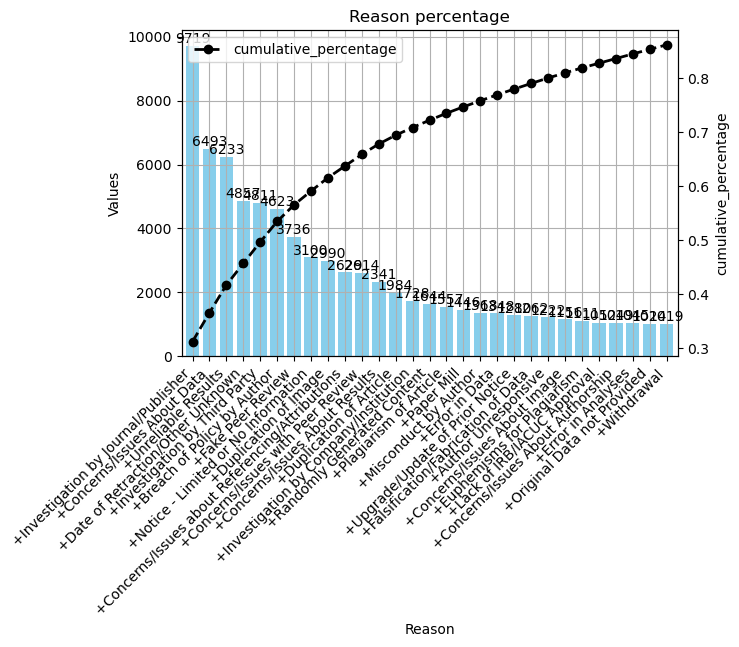

In [19]:
fig, ax = plt.subplots()

# Plot the bar chart
df_allreason[0][1:30].plot(kind='bar', color='skyblue', ax=ax, width=0.8)

# Plot the cumulative percentage line
df_allreason['cumulative_percentage'][1:30].plot(secondary_y=True, style='--ko', ax=ax, linewidth=2)

# Annotate each bar with its value
for i, value in enumerate(df_allreason[0][1:30]):
    ax.text(i, value + 0.05, str(value), ha='center', va='bottom')

# Set labels and title
ax.set_title('Reason percentage')
ax.set_xlabel('Reason')
ax.set_ylabel('Values')
ax.right_ax.set_ylabel('cumulative_percentage')

# Rotate x-axis labels
fig.autofmt_xdate(rotation=45)

# Show grid
ax.grid(True)

# Show legend
ax.right_ax.legend(['cumulative_percentage'], loc='upper left')

# Show the plot
plt.show()

In [20]:
#feature scaling
df_clustering=df[['Reason_Count', 'Contains_Investigation',
       'Contains_Unreliable', 'Contains_Data', 'Contains_Date',
       'Contains_Breach', 'Contains_Fake', 'Contains_Limited',
       'Contains_Duplication', 'Contains_Referencing', 'Contains_Peer',
       'Contains_Randomly', 'Contains_Plagiarism', 'Contains_Mill',
       'Contains_Misconduct', 'Contains_Upgrade', 'Contains_Falsification',
       'Contains_Unresponsive', 'Contains_Image', 'Contains_Approval',
       'Contains_Authorship', 'Contains_Withdrawal']]


In [21]:

# apply Standardisation
std_scaler = preprocessing.StandardScaler()
df_std = std_scaler.fit_transform(df_clustering) #Computing mean and Standard deviation of each feature in df_clustering

In [22]:
# find number of PCA components that explain 90% of the variance
pca = PCA(0.90).fit(df_std)
print("90%% variance is explained by: %.d components." % pca.n_components_)

90% variance is explained by: 15 components.


In [23]:
pca = PCA(n_components=15)  # project from 22 to 15 dimensions
df_clustering = pca.fit_transform(df_std)


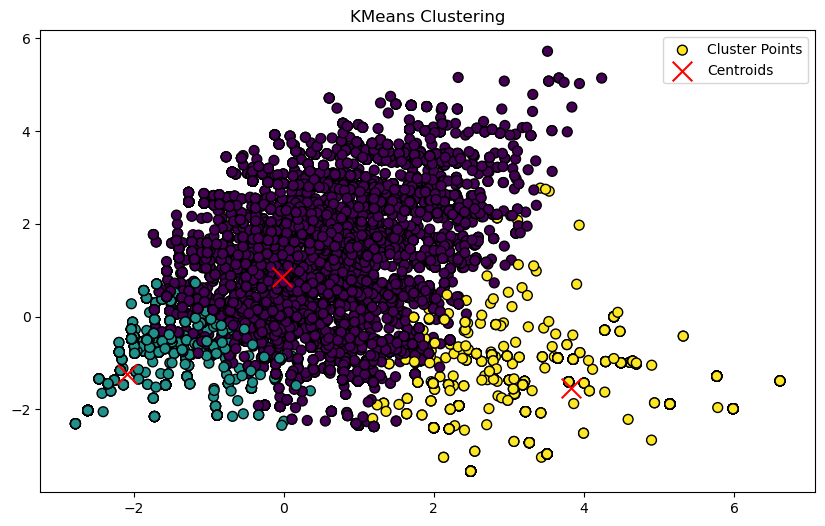

In [24]:
model = KMeans(n_clusters=3, random_state=0)
clusters = model.fit_predict(df_clustering)
centroids = model.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(df_clustering[:, 0], df_clustering[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, label='Cluster Points')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

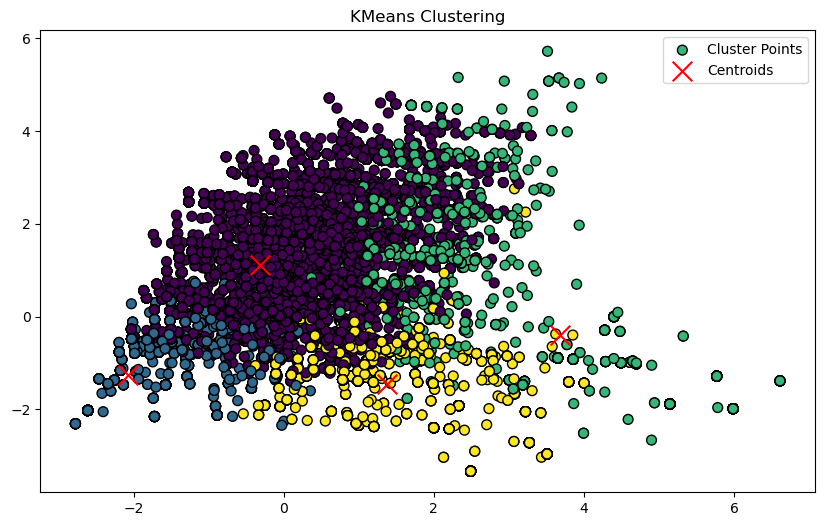

In [25]:
model = KMeans(n_clusters=4, random_state=0)
clusters = model.fit_predict(df_clustering)
centroids = model.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(df_clustering[:, 0], df_clustering[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, label='Cluster Points')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


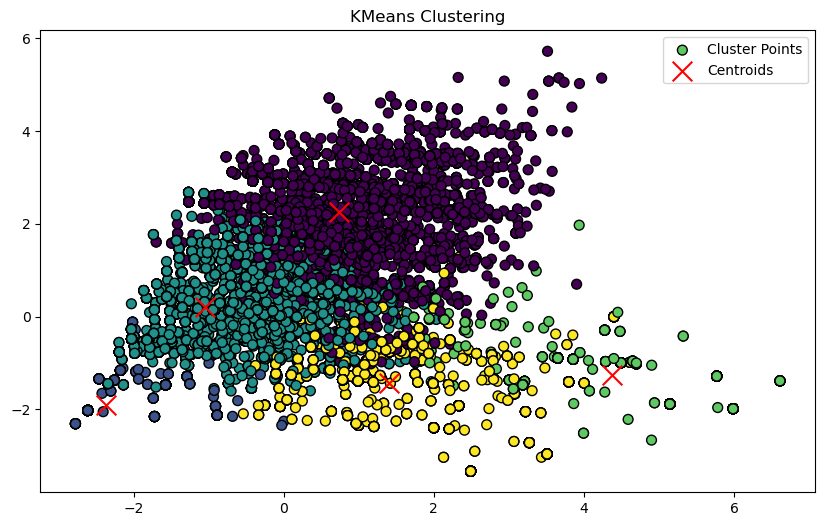

In [41]:
model = KMeans(n_clusters=5, random_state=0)
clusters = model.fit_predict(df_clustering)
centroids = model.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(df_clustering[:, 0], df_clustering[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, label='Cluster Points')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [26]:

# Check the dimensions of df_clustering and clusters
print("Dimensions of df_clustering:", df_clustering.shape)
print("Dimensions of clusters array:", len(clusters))

# # If they don't match, ensure the dimensions are compatible
# # For example, you can reshape the clusters array if needed
# # clusters = clusters.reshape(-1, 1)

# # Then assign the clusters to the DataFrame
# df_clustering['Cluster'] = pd.DataFrame(clusters)

Dimensions of df_clustering: (35215, 15)
Dimensions of clusters array: 35215


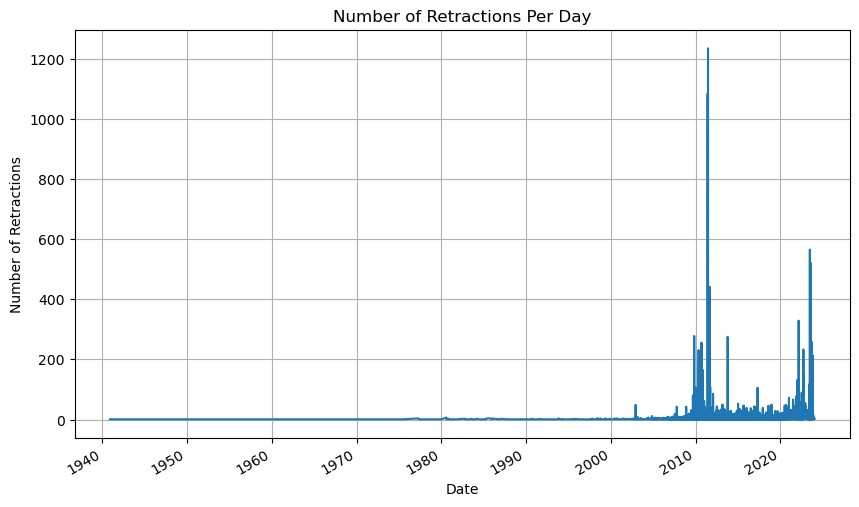

In [27]:
plt.figure(figsize=(10, 6))
df1.plot(kind='line')
plt.title('Number of Retractions Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Retractions')
plt.grid(True)
plt.show()

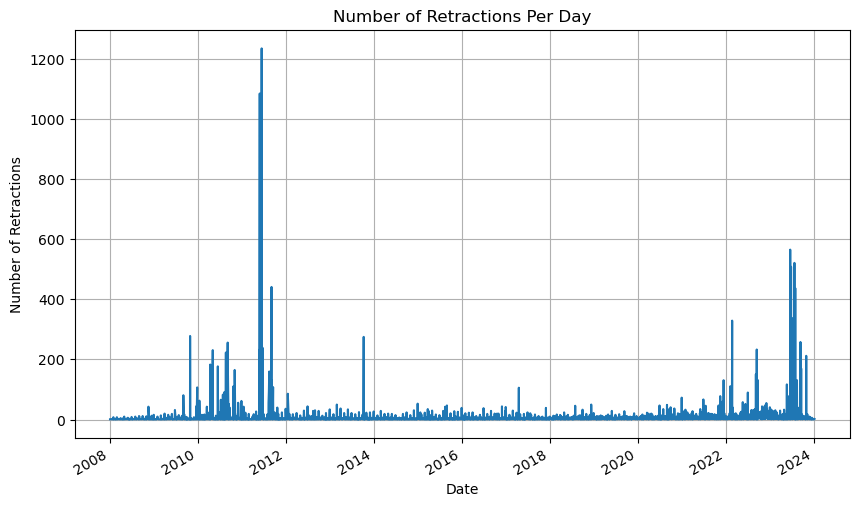

In [28]:
df2=df1[df1.index> pd.Timestamp('2008-01-01')]
plt.figure(figsize=(10, 6))
df2.plot(kind='line')
plt.title('Number of Retractions Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Retractions')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

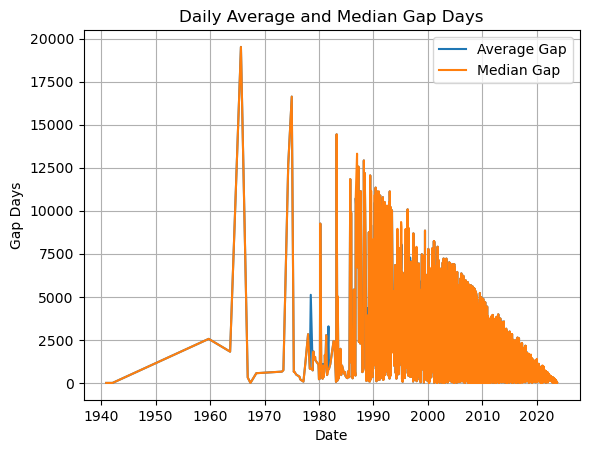

In [29]:
df3=df.groupby(df['OriginalPaperDate'].dt.date)['DateDifference'].agg(['mean', 'median', 'min', 'max', 'count'])
plt.figure(figsize=(10, 6))
df3[['mean', 'median']].plot()
plt.title('Daily Average and Median Gap Days')
plt.xlabel('Date')
plt.ylabel('Gap Days')
plt.legend(['Average Gap', 'Median Gap'])
plt.grid(True)
plt.show()

In [30]:
df.head()

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,Contains_Plagiarism,Contains_Mill,Contains_Misconduct,Contains_Upgrade,Contains_Falsification,Contains_Unresponsive,Contains_Image,Contains_Approval,Contains_Authorship,Contains_Withdrawal
0,50792,A fractional order nonlinear model of the love...,(B/T) Data Science;(PHY) Mathematics;,"Department of Mathematical Sciences, College o...",Scientific Reports,Springer - Nature Publishing Group,United Arab Emirates,Zulqurnain Sabir;Salem Ben Said,NaN,Research Article;,...,0,0,0,0,0,0,0,0,0,0
1,50782,Investigation of automotive digital mirrors er...,(PHY) Engineering - Mechanical;,"Department of Physics, Faculty of Science, Cai...",Journal of Optics (India),Springer,Egypt,H S Ayoub;Wessam M Hussein;Y H Elbashar,NaN,Research Article;,...,0,0,0,0,0,0,0,0,0,0
2,50781,Optical spectroscopic analysis of bandpass fil...,(PHY) Chemistry;(PHY) Crystallography/Spectros...,"Egypt Nanotechnology Center ((EGNC)), Cairo Un...",Journal of Optics (India),Springer,Egypt,Y H Elbashar;M A Mohamed;D Rayan;A M Badr;H A ...,NaN,Research Article;,...,0,0,0,0,0,0,0,0,0,0
3,50731,THz Design Variable Estimation by Deep Optimiz...,(B/T) Computer Science;(B/T) Technology;,"School of Computing Science and Engineering, V...","Terahertz Devices, Circuits and Systems",Springer,India,L Sathish Kumar;B Sathish Kumar;A Padmapriya;S...,NaN,Book Chapter/Reference Work;,...,1,0,0,0,0,0,0,0,0,0
4,50727,A Study on Glycyrrhiza glabra-Fortified Bread:...,(BLS) Biochemistry;(ENV) Food Science;(HSC) Nu...,"Department of Mechanical Engineering, Aarupada...",Bioinorganic Chemistry and Applications,Hindawi,Ethiopia;India;Turkey,M Prabhahar;Gomathi Kannayiram;Prakash Sekar;S...,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,0,1,0,0,0,0,0,0,0,0


In [31]:
df_split.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,+Duplication of Article,+Euphemisms for Duplication,+Investigation by Journal/Publisher,+Objections by Author(s),+Randomly Generated Content,+Unreliable Results,,None,None,None,None,None,None
1,+Fake Peer Review,+Investigation by Journal/Publisher,+Objections by Author(s),+Unreliable Results,,None,None,None,None,None,None,None,None
2,+Concerns/Issues with Peer Review,+Fake Peer Review,+Investigation by Journal/Publisher,+Objections by Author(s),+Unreliable Results,,None,None,None,None,None,None,None
3,+Date of Retraction/Other Unknown,+Euphemisms for Plagiarism,+Objections by Author(s),+Plagiarism of Article,,None,None,None,None,None,None,None,None
4,+Concerns/Issues About Data,+Concerns/Issues About Results,+Concerns/Issues about Referencing/Attributions,+Concerns/Issues with Peer Review,+Investigation by Journal/Publisher,+Investigation by Third Party,+Paper Mill,+Randomly Generated Content,+Unreliable Results,,None,None,None


In [33]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Reason' contains categorical labels representing different reasons for retraction

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Reason' column
df['Reason_encoded'] = label_encoder.fit_transform(df['Reason'])

# Now 'Reason_encoded' contains encoded categorical labels for 'Reason'

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Selecting features and target variable
features = ['Reason_Count', 'Contains_Investigation', 'Contains_Unreliable', 
            'Contains_Data', 'Contains_Date', 'Contains_Breach', 'Contains_Fake', 
            'Contains_Limited', 'Contains_Duplication', 'Contains_Referencing', 
            'Contains_Peer', 'Contains_Randomly', 'Contains_Plagiarism', 'Contains_Mill', 
            'Contains_Misconduct', 'Contains_Upgrade', 'Contains_Falsification', 
            'Contains_Unresponsive', 'Contains_Image', 'Contains_Approval', 
            'Contains_Authorship', 'Contains_Withdrawal']
target_variable = 'Reason'

# Preparing data
X = df[features]  # Features
y = df[target_variable]  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the Naïve Bayes classifier
classifier = MultinomialNB()  # You can use other Naïve Bayes algorithms if needed
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
# print(classification_report(y_test, y_pred))


Accuracy: 0.46159307113445974
Classification Report:


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Selecting features and target variable
features = ['Reason_Count', 'Contains_Investigation', 'Contains_Unreliable', 
            'Contains_Data', 'Contains_Date', 'Contains_Breach', 'Contains_Fake', 
            'Contains_Limited', 'Contains_Duplication', 'Contains_Referencing', 
            'Contains_Peer', 'Contains_Randomly', 'Contains_Plagiarism', 'Contains_Mill', 
            'Contains_Misconduct', 'Contains_Upgrade', 'Contains_Falsification', 
            'Contains_Unresponsive', 'Contains_Image', 'Contains_Approval', 
            'Contains_Authorship', 'Contains_Withdrawal']
target_variable = 'Reason'

# Preparing data
X = df[features]  # Features
y = df[target_variable]  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building and training the Naïve Bayes classifier
classifier = MultinomialNB()  # You can use other Naïve Bayes algorithms if needed
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
# print(classification_report(y_test, y_pred))

Accuracy: 0.4548982489351633
Classification Report:


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Selecting features and target variable
features = ['Reason_Count', 'Contains_Investigation', 'Contains_Unreliable', 
            'Contains_Data', 'Contains_Date', 'Contains_Breach', 'Contains_Fake', 
            'Contains_Limited', 'Contains_Duplication', 'Contains_Referencing', 
            'Contains_Peer', 'Contains_Randomly', 'Contains_Plagiarism', 'Contains_Mill', 
            'Contains_Misconduct', 'Contains_Upgrade', 'Contains_Falsification', 
            'Contains_Unresponsive', 'Contains_Image', 'Contains_Approval', 
            'Contains_Authorship', 'Contains_Withdrawal']
target_variable = 'Reason'

# Preparing data
X = df[features]  # Features
y = df[target_variable]  # Target variable 

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
# print(classification_report(y_test, y_pred))

Accuracy: 0.6450376260116427
Classification Report:


In [38]:
from sklearn.tree import DecisionTreeClassifier

# Selecting features and target variable
features = ['Reason_Count', 'Contains_Investigation', 'Contains_Unreliable', 
            'Contains_Data', 'Contains_Date', 'Contains_Breach', 'Contains_Fake', 
            'Contains_Limited', 'Contains_Duplication', 'Contains_Referencing', 
            'Contains_Peer', 'Contains_Randomly', 'Contains_Plagiarism', 'Contains_Mill', 
            'Contains_Misconduct', 'Contains_Upgrade', 'Contains_Falsification', 
            'Contains_Unresponsive', 'Contains_Image', 'Contains_Approval', 
            'Contains_Authorship', 'Contains_Withdrawal']
target_variable = 'Reason'

# Preparing data
X = df[features]  # Features
y = df[target_variable]  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)  
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


Accuracy: 0.6444696862132614


In [40]:
from sklearn.ensemble import VotingClassifier

# Selecting features and target variable
features = ['Reason_Count', 'Contains_Investigation', 'Contains_Unreliable', 
            'Contains_Data', 'Contains_Date', 'Contains_Breach', 'Contains_Fake', 
            'Contains_Limited', 'Contains_Duplication', 'Contains_Referencing', 
            'Contains_Peer', 'Contains_Randomly', 'Contains_Plagiarism', 'Contains_Mill', 
            'Contains_Misconduct', 'Contains_Upgrade', 'Contains_Falsification', 
            'Contains_Unresponsive', 'Contains_Image', 'Contains_Approval', 
            'Contains_Authorship', 'Contains_Withdrawal']
target_variable = 'Reason'

# Preparing data
X = df[features]  # Features
y = df[target_variable]  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing classifiers
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Creating VotingClassifier with the three classifiers
voting_classifier = VotingClassifier(estimators=[('nb', nb_classifier), ('rf', rf_classifier), ('dt', dt_classifier)], voting='hard')

# Training the ensemble classifier
voting_classifier.fit(X_train, y_train)

# Making predictions
y_pred = voting_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.643475791566094
Classification Report:
                                                                                                                                                                                                                                                                                                                                                                     precision    recall  f1-score   support

                                                                                                                                                                                                                 +Author Unresponsive;+Breach of Policy by Author;+Date of Retraction/Other Unknown;+Lack of Approval from Third Party;+Original Data not Provided;       1.00      0.00      0.00         1
                                                                                                                                                          